# Chapter 16: Reinforcement Learning

_Reinforcement Learning_ (RL) is when a software _agent_ makes _observations_ and takes _actions_ within an _evironment_, and in return it receives _awards_. RL is one of the oldest forms of machine learning, however it was revolutionized when [DeepMind demonstrated that a system could learn to play just about any Atari game](https://arxiv.org/pdf/1312.5602v1.pdf). It could even [outperform humans](https://storage.googleapis.com/deepmind-data/assets/papers/DeepMindNature14236Paper.pdf) using only the raw pixel values as input without any prior knowledge of the rules of the game. These discoveries eventually led to the victory of their system, AlphaGo, over Ke Jie, the world champion of the game _Go_.

## Policy Search

The goal in RL is to train a system to be able to take actions that it knows will maximize its long term rewards. What actions constitute a positive reward and a negative reward (i.e. an action the system should not take) depends on the particular problem.

The aglorithm an agent uses to determine its next action is called its _policy_. One of the most simple policies is a _stochastic policy_, where the next action is determined entirely by random chance.

_Policy parameters_ are the parameters of the algorithm, an RL system wants to find the policy parameters which lead to the best outcome. Doing so is called a _policy search_ over a _policy space_. The simplest policy search is a brute force search, but if this is not possible, then there are other technqiues:

- _Genetic algorithms_ start by trying out a bunch of random policies, keeping the ones that lead to the best result, then iterating with random augmentations of the best policies to eventually converge to the optimal one.

- Another approach is to evaluate the gradients of the rewards and perform a gradient ascent to the policy that leads to the optimal result. This is called _policy gradients_ and will be discussed later.

## Setting Up

In [0]:
import tensorflow as tf
import numpy as np
import os
import sys

def reset_graph(seed=42):
  tf.reset_default_graph()
  tf.set_random_seed(seed)
  np.random.seed(seed)

%matplotlib inline
import matplotlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

## Introduction to OpenAI Gym

[OpenAI gym](https://gym.openai.com/) is a toolkit that provides simulated environments for training and developing RL agents.

In [0]:
# Rendering a Ms. Pacman game.

import gym

env = gym.make('MsPacman-v0')

# Initialize the environment with reset()
obs = env.reset()

In [85]:
obs.shape

(210, 160, 3)

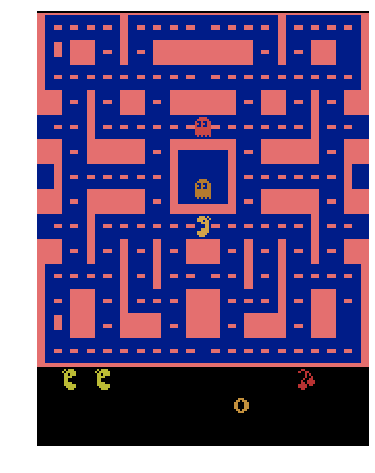

In [88]:
# Plotting the environment

img = env.render(mode='rgb_array')
plt.figure(figsize=(10,8))
plt.imshow(img)
plt.axis('off')
plt.show()

In [89]:
# In this environment, the image is the same as the entire environment, but in
# other environments this is not always the case.

(img == obs).all()

True

In [0]:
# Utility function for plotting environemnts.

def plot_environment(env, figsize=(10,8)):
  plt.close()
  plt.figure(figsize=figsize)
  img = env.render(mode="rgb_array")
  plt.imshow(img)
  plt.axis("off")
  plt.show()

In [91]:
# The action space has 9 actions, corresponding to the 9 actions you can take
# with the joy stick (8 directions, or remain in center).

env.action_space

Discrete(9)

In [0]:
# Moving the joystick for a number of turns.

env.reset()
for step in range(110):
  env.step(3) # left
for step in range(40):
  env.step(8) # lower-left

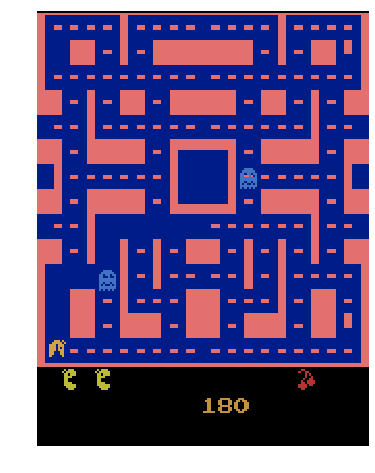

In [93]:
plot_environment(env)

In [0]:
obs, reward, done, info = env.step(0)

In [95]:
# The obs object tells us what the current state looks like, in this
# case it is a 210x160 RGB image.

obs.shape

(210, 160, 3)

In [96]:
# This tells us how much reward the agent has received up to this point.

reward

0.0

In [97]:
# This tells us if the game is over. 

done

False

In [98]:
# This gives us some extra information for debugging. You should not use this
# to train a model.

info

{'ale.lives': 3}

The code below will play a game where it moves the joystick in a different random direction every 10 moves.

In [0]:
# Playing the game with OpenAI Gym.

frames = []

n_max_steps = 1000
n_change_steps = 10

obs = env.reset()
for step in range(n_max_steps):
  img = env.render(mode='rgb_array')
  frames.append(img)
  if step % n_change_steps == 0:
    action = env.action_space.sample()
  obs, reward, done, info = env.step(action)
  if done:
    break

In [0]:
# Defining a utility functions for displaying an animation.

from IPython.display import HTML

def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch,

def plot_animation(frames, repeat=False, interval=40):
  plt.close()
  fig = plt.figure()
  patch = plt.imshow(frames[0])
  plt.axis('off')
  anim = animation.FuncAnimation(fig, update_scene, fargs=(frames, patch),
                                 frames=len(frames), repeat=repeat,
                                 interval=interval)
  return HTML(anim.to_html5_video())

In [101]:
%matplotlib notebook
plot_animation(frames)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>